In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVC

In [105]:
data=pd.read_csv(r"C:\Users\rosha\Desktop\assignments\SVM\mushroom.csv")
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [107]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [108]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [109]:
data.mode()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,182,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,...,universal,white,one,sheathing,brown,abundant,urban,poisonous,2.0,3.111415
1,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.988930


In [110]:
data["Unnamed: 0"].nunique()

976

In [111]:
data[data.duplicated(keep=False)]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,618,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,871,flat,scaly,pink,no,spicy,attached,distant,narrow,red,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


In [112]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [113]:
numbercol=data.select_dtypes(include="number")
numbercol

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245
...,...,...
1995,5.877891,17.464145
1996,6.500840,13.501957
1997,13.558064,11.270020
1998,11.092703,8.423199


In [114]:
objectcol=data.select_dtypes(exclude="number")
objectcol

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,pink,orange,partial,orange,one,flaring,purple,abundant,leaves,poisonous
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,brown,red,partial,brown,two,evanescent,yellow,abundant,woods,poisonous
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous


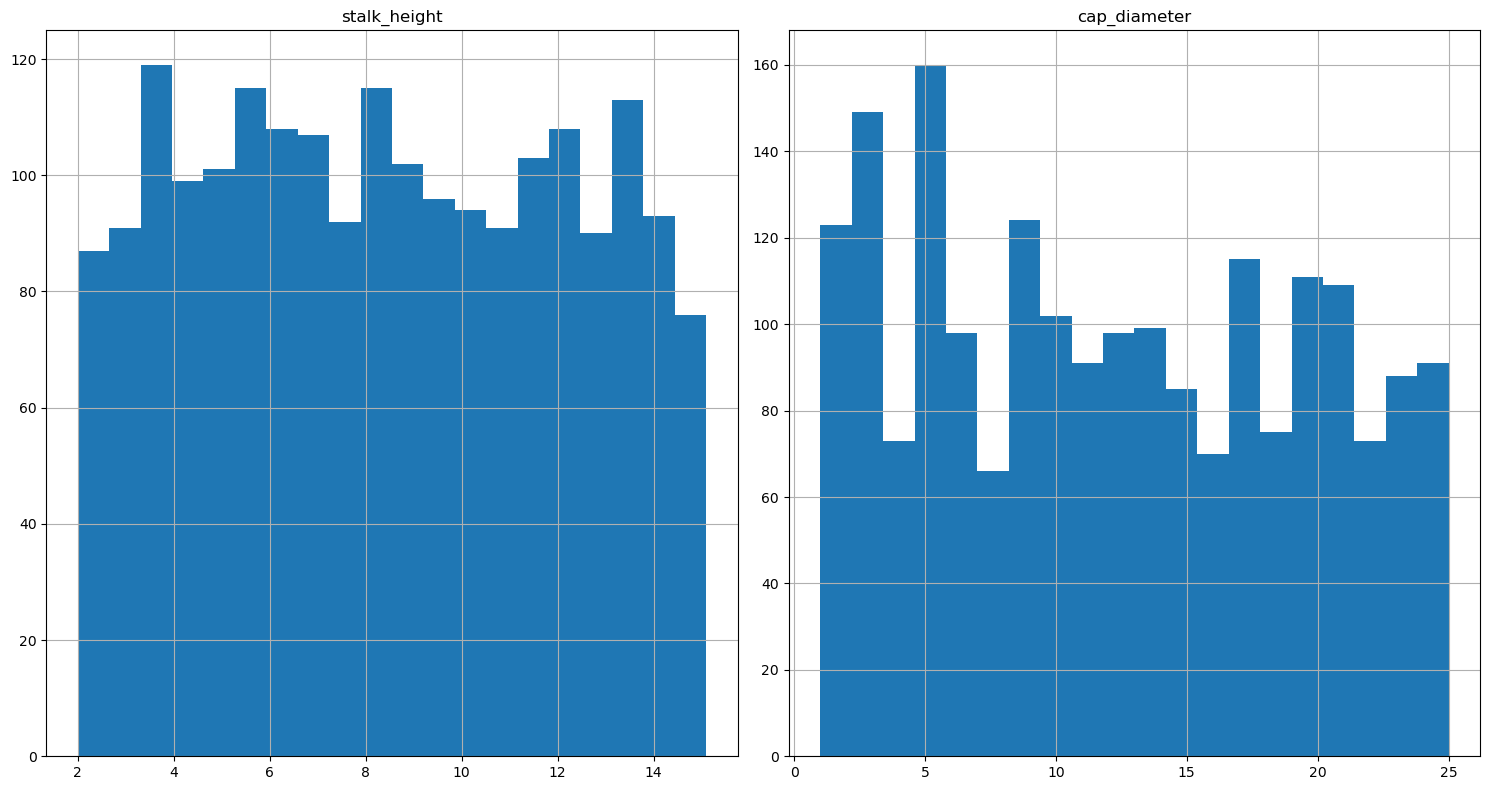

In [115]:
numbercol.hist(bins=20,layout=(1,2),figsize=(15,8))
plt.tight_layout()
plt.show()

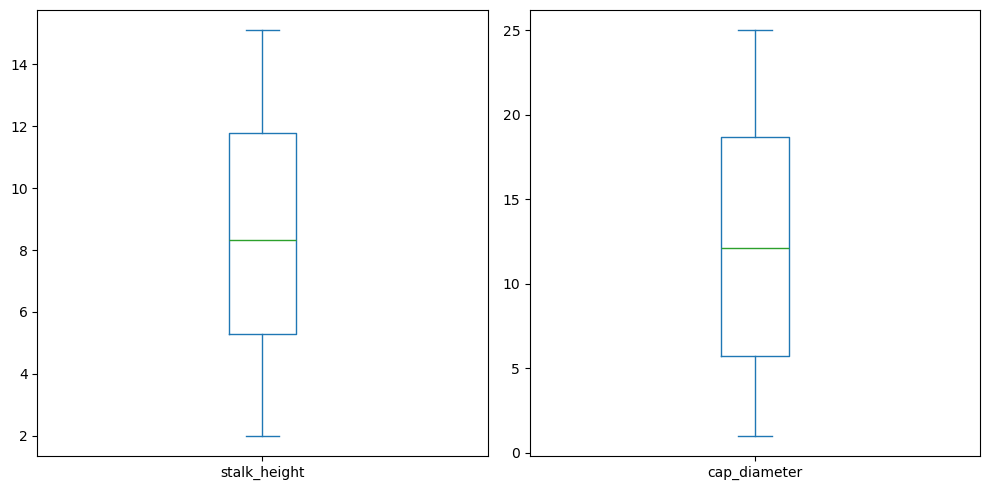

In [116]:
numbercol.plot(kind="box",subplots=True,layout=(1,2),figsize=(10,5))
plt.tight_layout()
plt.show()

In [117]:
numbercol.corr()

,stalk_height,cap_diameter
stalk_height,1.000000,-0.003486
cap_diameter,-0.003486,1.000000


In [118]:
numbercol.skew()

stalk_height    0.038312
cap_diameter    0.107595
dtype: float64

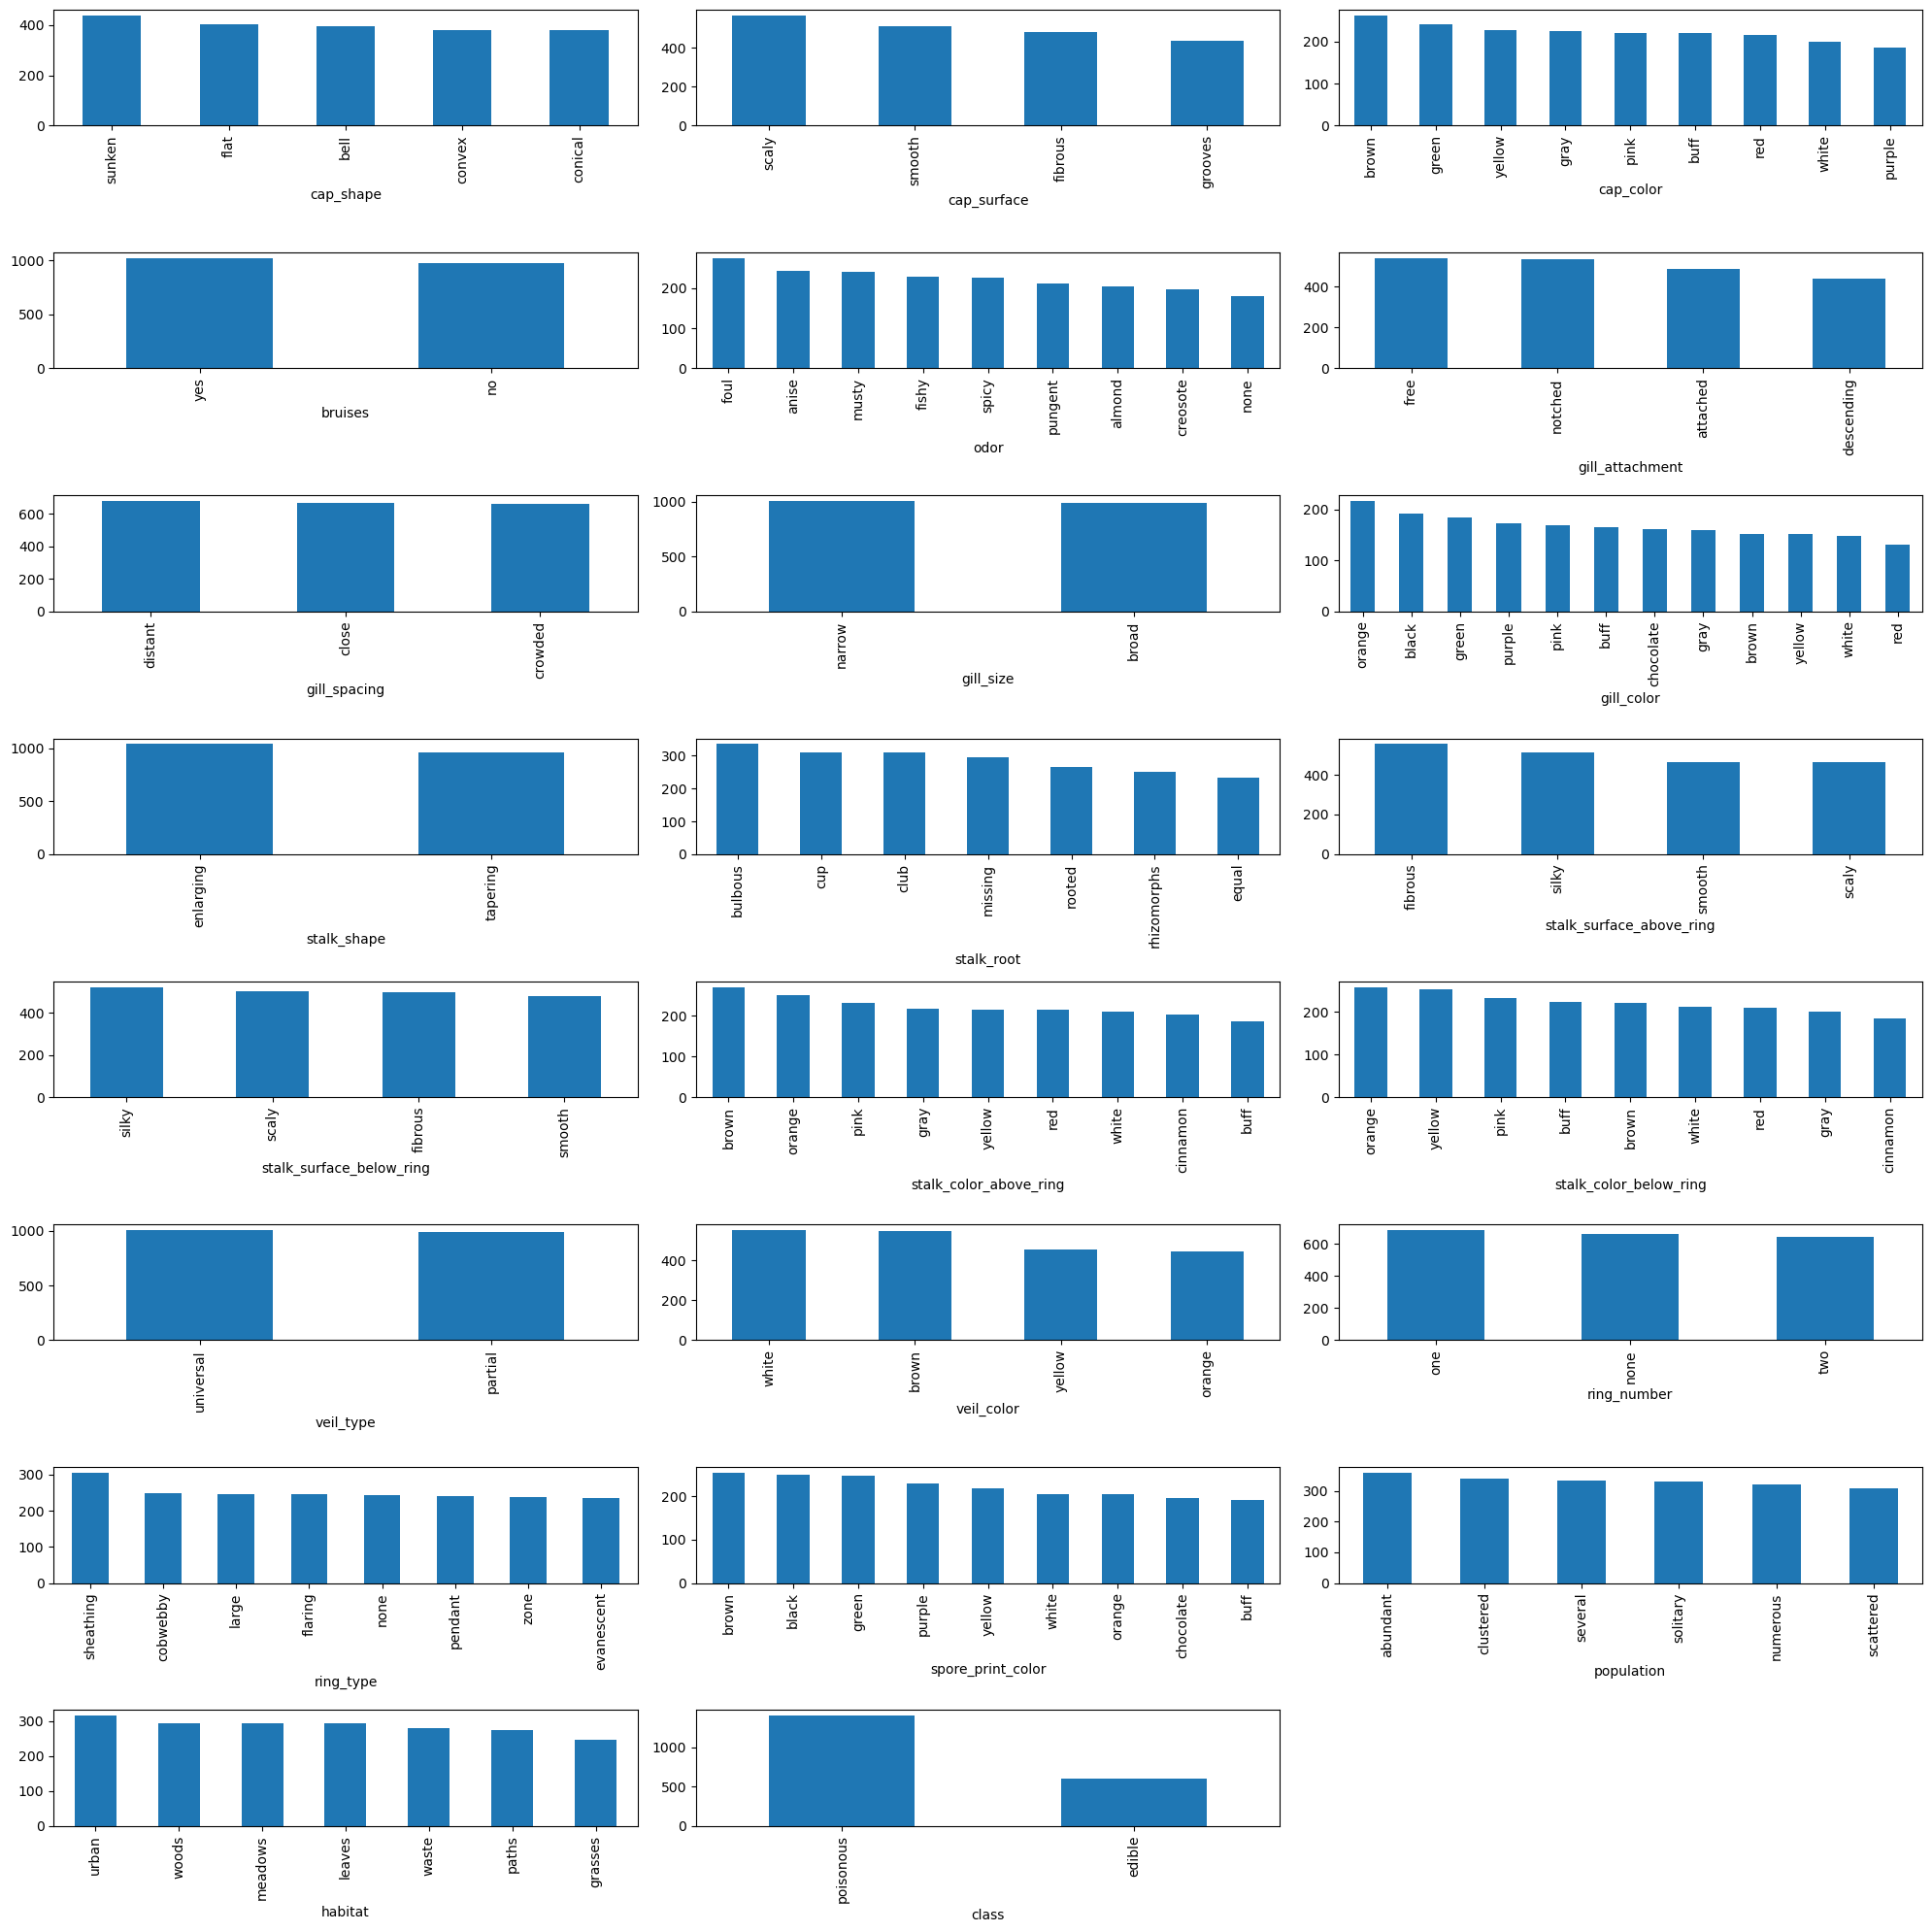

In [119]:
i=1
plt.figure(figsize=(20,20))
for col in objectcol :
    plt.subplot(8,3,i)
    data[col].value_counts().plot(kind="bar")
    i+=1
plt.tight_layout()
plt.show()

In [120]:
one=OneHotEncoder(sparse_output=False)
onearray=one.fit_transform(objectcol.drop("class",axis=1))
onedata=pd.DataFrame(onearray,columns=one.get_feature_names_out())
onedata

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
le=LabelEncoder()
onedata["class"]=le.fit_transform(objectcol["class"])
onedata["class"]

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [122]:
onedata

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [123]:
numbercol
ss=StandardScaler()
ssarray=ss.fit_transform(numbercol)
ssarray_df=pd.DataFrame(ssarray,columns=ss.get_feature_names_out())
ssarray_df

,stalk_height,cap_diameter
0,1.576459,-1.030123
1,-1.216463,0.958407
2,0.163717,-0.724904
3,-0.871852,1.222967
4,1.511897,0.032765
...,...,...
1995,-0.695623,0.730771
1996,-0.527090,0.168525
1997,1.382181,-0.148193
1998,0.715199,-0.552164


In [124]:
finaldata=pd.concat([ssarray_df,onedata],axis=1)
finaldata

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class
0,1.576459,-1.030123,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,-1.216463,0.958407,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.163717,-0.724904,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,-0.871852,1.222967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.511897,0.032765,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.695623,0.730771,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1996,-0.527090,0.168525,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1997,1.382181,-0.148193,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1998,0.715199,-0.552164,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [125]:
le=LabelEncoder()
for col in objectcol :
    objectcol[col]=le.fit_transform(objectcol[col])
objectcol
objectdata=pd.concat([ssarray_df,objectcol],axis=1)
objectdata

,stalk_height,cap_diameter,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,1.576459,-1.030123,4,2,7,0,1,1,2,0,...,3,8,0,0,2,6,3,1,5,1
1,-1.216463,0.958407,4,0,6,0,1,3,1,1,...,2,0,1,0,2,6,1,2,5,0
2,0.163717,-0.724904,3,1,5,1,4,1,1,0,...,8,3,1,3,2,6,6,0,5,1
3,-0.871852,1.222967,0,2,4,1,3,3,0,0,...,8,5,0,3,2,0,4,1,0,1
4,1.511897,0.032765,3,3,8,1,5,2,1,1,...,3,7,1,2,0,4,8,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.695623,0.730771,4,2,0,1,4,0,1,1,...,5,4,0,1,1,2,6,0,1,1
1996,-0.527090,0.168525,4,2,5,1,5,0,2,1,...,5,4,0,2,1,7,8,2,5,1
1997,1.382181,-0.148193,2,1,3,1,3,3,0,1,...,0,6,0,0,2,1,8,0,6,1
1998,0.715199,-0.552164,0,3,7,0,7,2,0,1,...,3,5,1,3,1,0,1,5,6,1


In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x=finaldata.drop("class",axis=1)
y=finaldata["class"]

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [129]:
finaldata.skew()

stalk_height         0.038312
cap_diameter         0.107595
cap_shape_bell       1.512903
cap_shape_conical    1.577468
cap_shape_convex     1.577468
                       ...   
habitat_paths        2.106847
habitat_urban        1.876711
habitat_waste        2.076563
habitat_woods        1.989628
class               -0.873527
Length: 127, dtype: float64

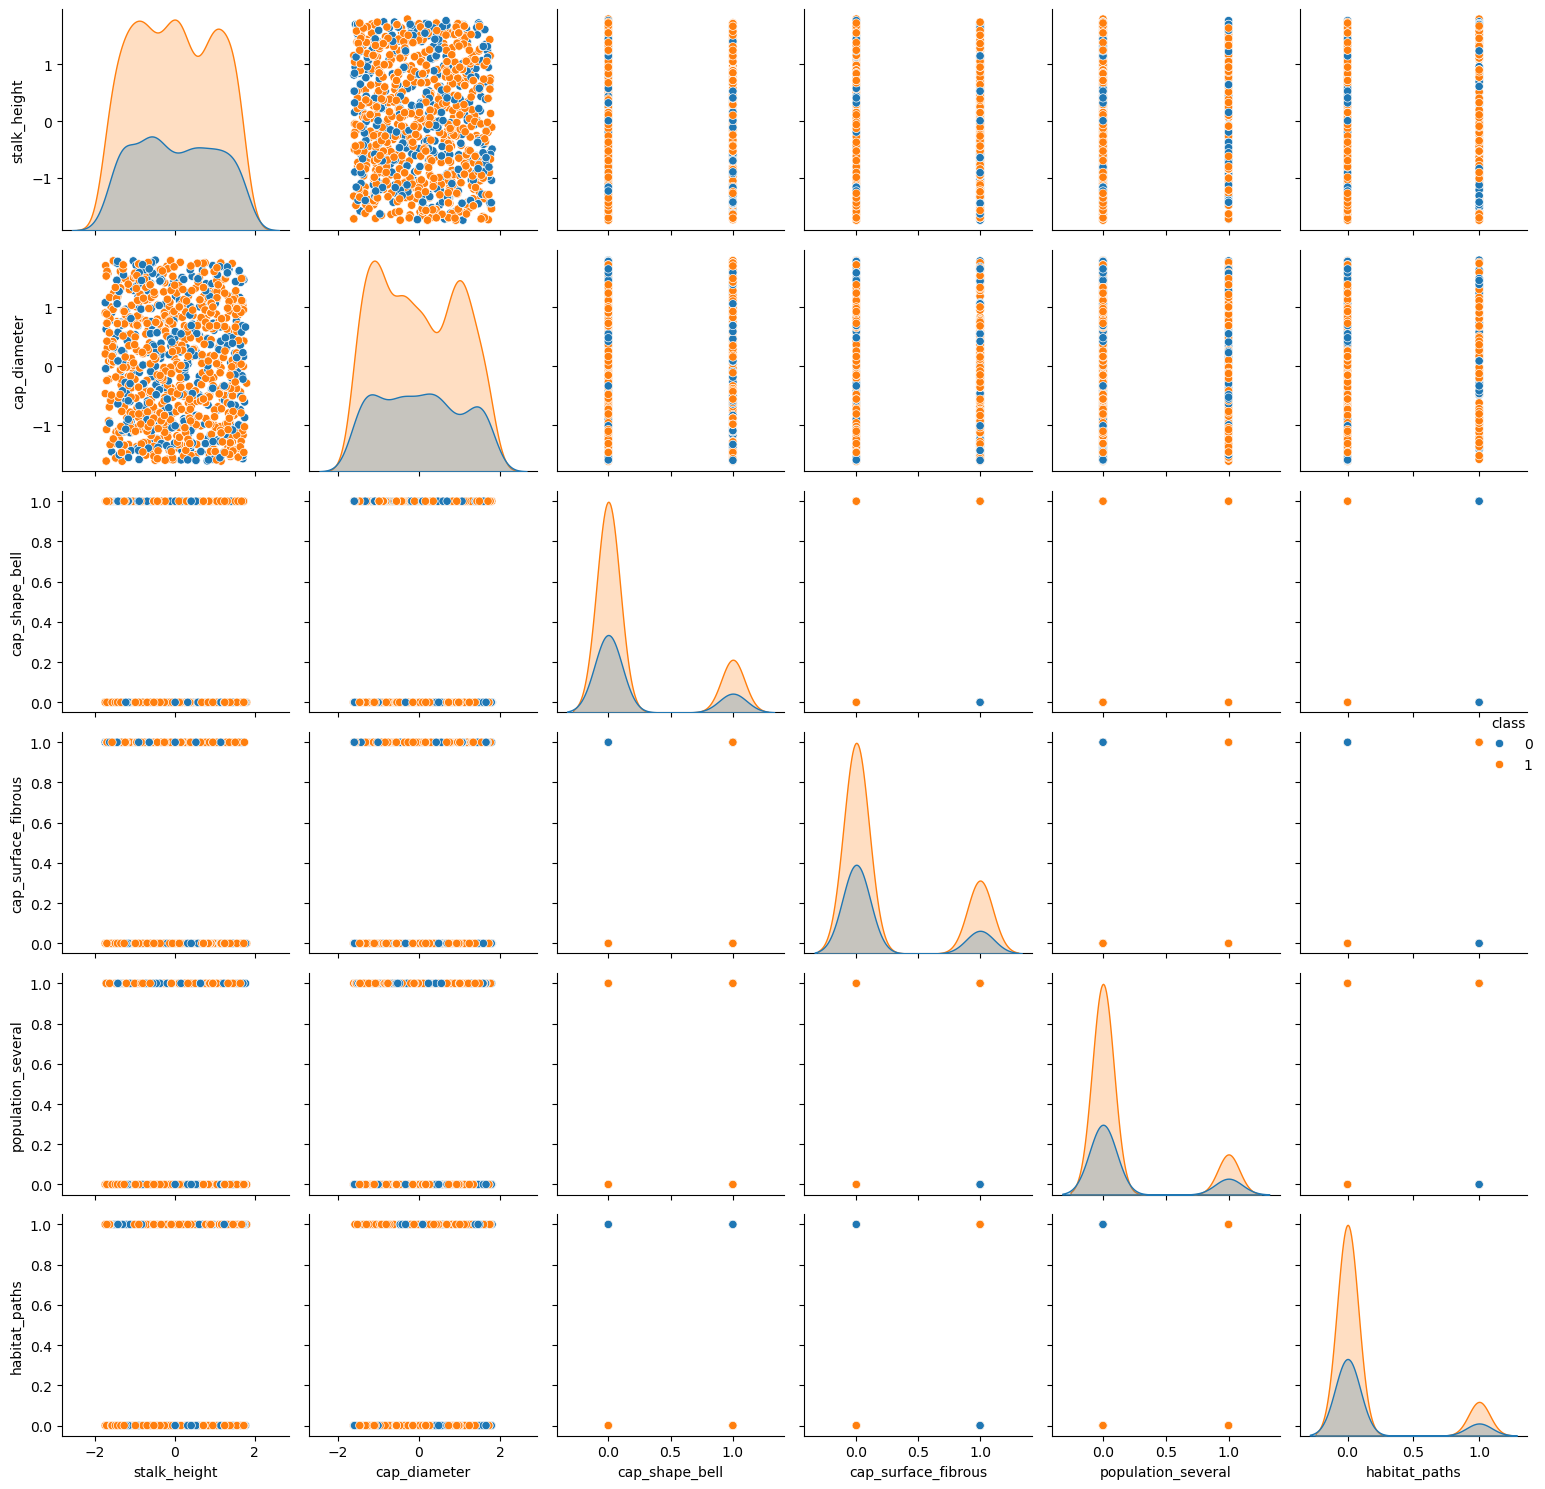

In [130]:
fewcolumns=["stalk_height","cap_diameter","cap_shape_bell","cap_surface_fibrous","population_several","habitat_paths","class"]
sns.pairplot(data=finaldata[fewcolumns],hue="class")
plt.tight_layout()
plt.show()

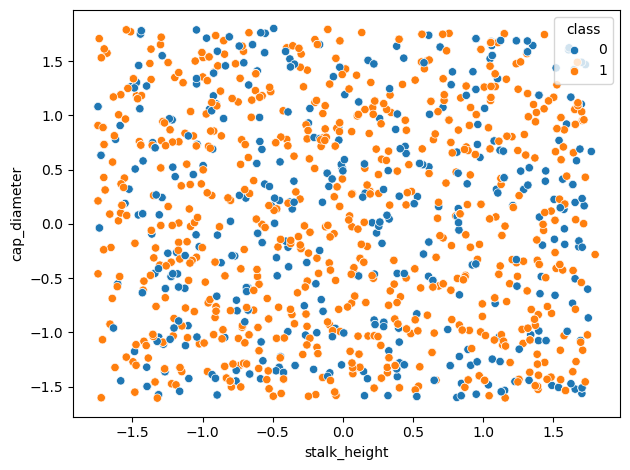

In [131]:
sns.scatterplot(x="stalk_height",y="cap_diameter",data=finaldata,hue="class")
plt.tight_layout()
plt.show()

In [132]:
svm=SVC(kernel="rbf",gamma=1,C=1,random_state=42)
svm.fit(x_train,y_train)
svm.score(x_test,y_test)


0.89

In [133]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [134]:
y_pred=svm.predict(x_test)

In [135]:
accuracy_score(y_test,y_pred)

0.89

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        67
           1       0.86      1.00      0.92       133

    accuracy                           0.89       200
   macro avg       0.93      0.84      0.86       200
weighted avg       0.91      0.89      0.88       200



In [137]:
confusion_matrix(y_test,y_pred)

array([[ 45,  22],
       [  0, 133]], dtype=int64)

In [147]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10)
svm11=SVC(kernel="rbf",gamma=1,C=1,random_state=42)
cross=cross_val_score(svm2,x,y,cv=kfold)
print(cross.mean())

0.8905


In [139]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
svm1=SVC(random_state=42)
grid=GridSearchCV(svm1,param_grid=param_grid,cv=10)
grid.fit(x_train,y_train)

In [140]:
grid.best_score_

0.8761111111111111

In [141]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [142]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10)
svm2=SVC(kernel="rbf",gamma="scale",C=10,random_state=42)
cross=cross_val_score(svm2,x,y,cv=kfold)
print(cross.mean())

0.8905


In [143]:
svm2=SVC(kernel="rbf",gamma="scale",C=10,random_state=42)
svm2.fit(x_train,y_train)
svm2.score(x_test,y_test)

0.875

1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [153]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(x_train,y_train)
print("linear")
print(svc_linear.score(x_test,y_test))
print("\n")
svc_poly=SVC(kernel='poly')
svc_poly.fit(x_train,y_train)
print("poly")
print(svc_poly.score(x_test,y_test))
print("\n")
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(x_train,y_train)
print("rbf")
print(svc_rbf.score(x_test,y_test))

linear
0.665


poly
0.885


rbf
0.82


In [ ]:
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

In [ ]:
SVM demonstrated strong classification performance for the Mushroom dataset after hyperparameter tuning.
It handled non-linear decision boundaries well, achieving high accuracy.
However, it struggled with class imbalance and required significant preprocessing and tuning effort.
Despite these limitations, SVM remains a powerful choice for binary classification tasks with complex, high-dimensional data.